[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


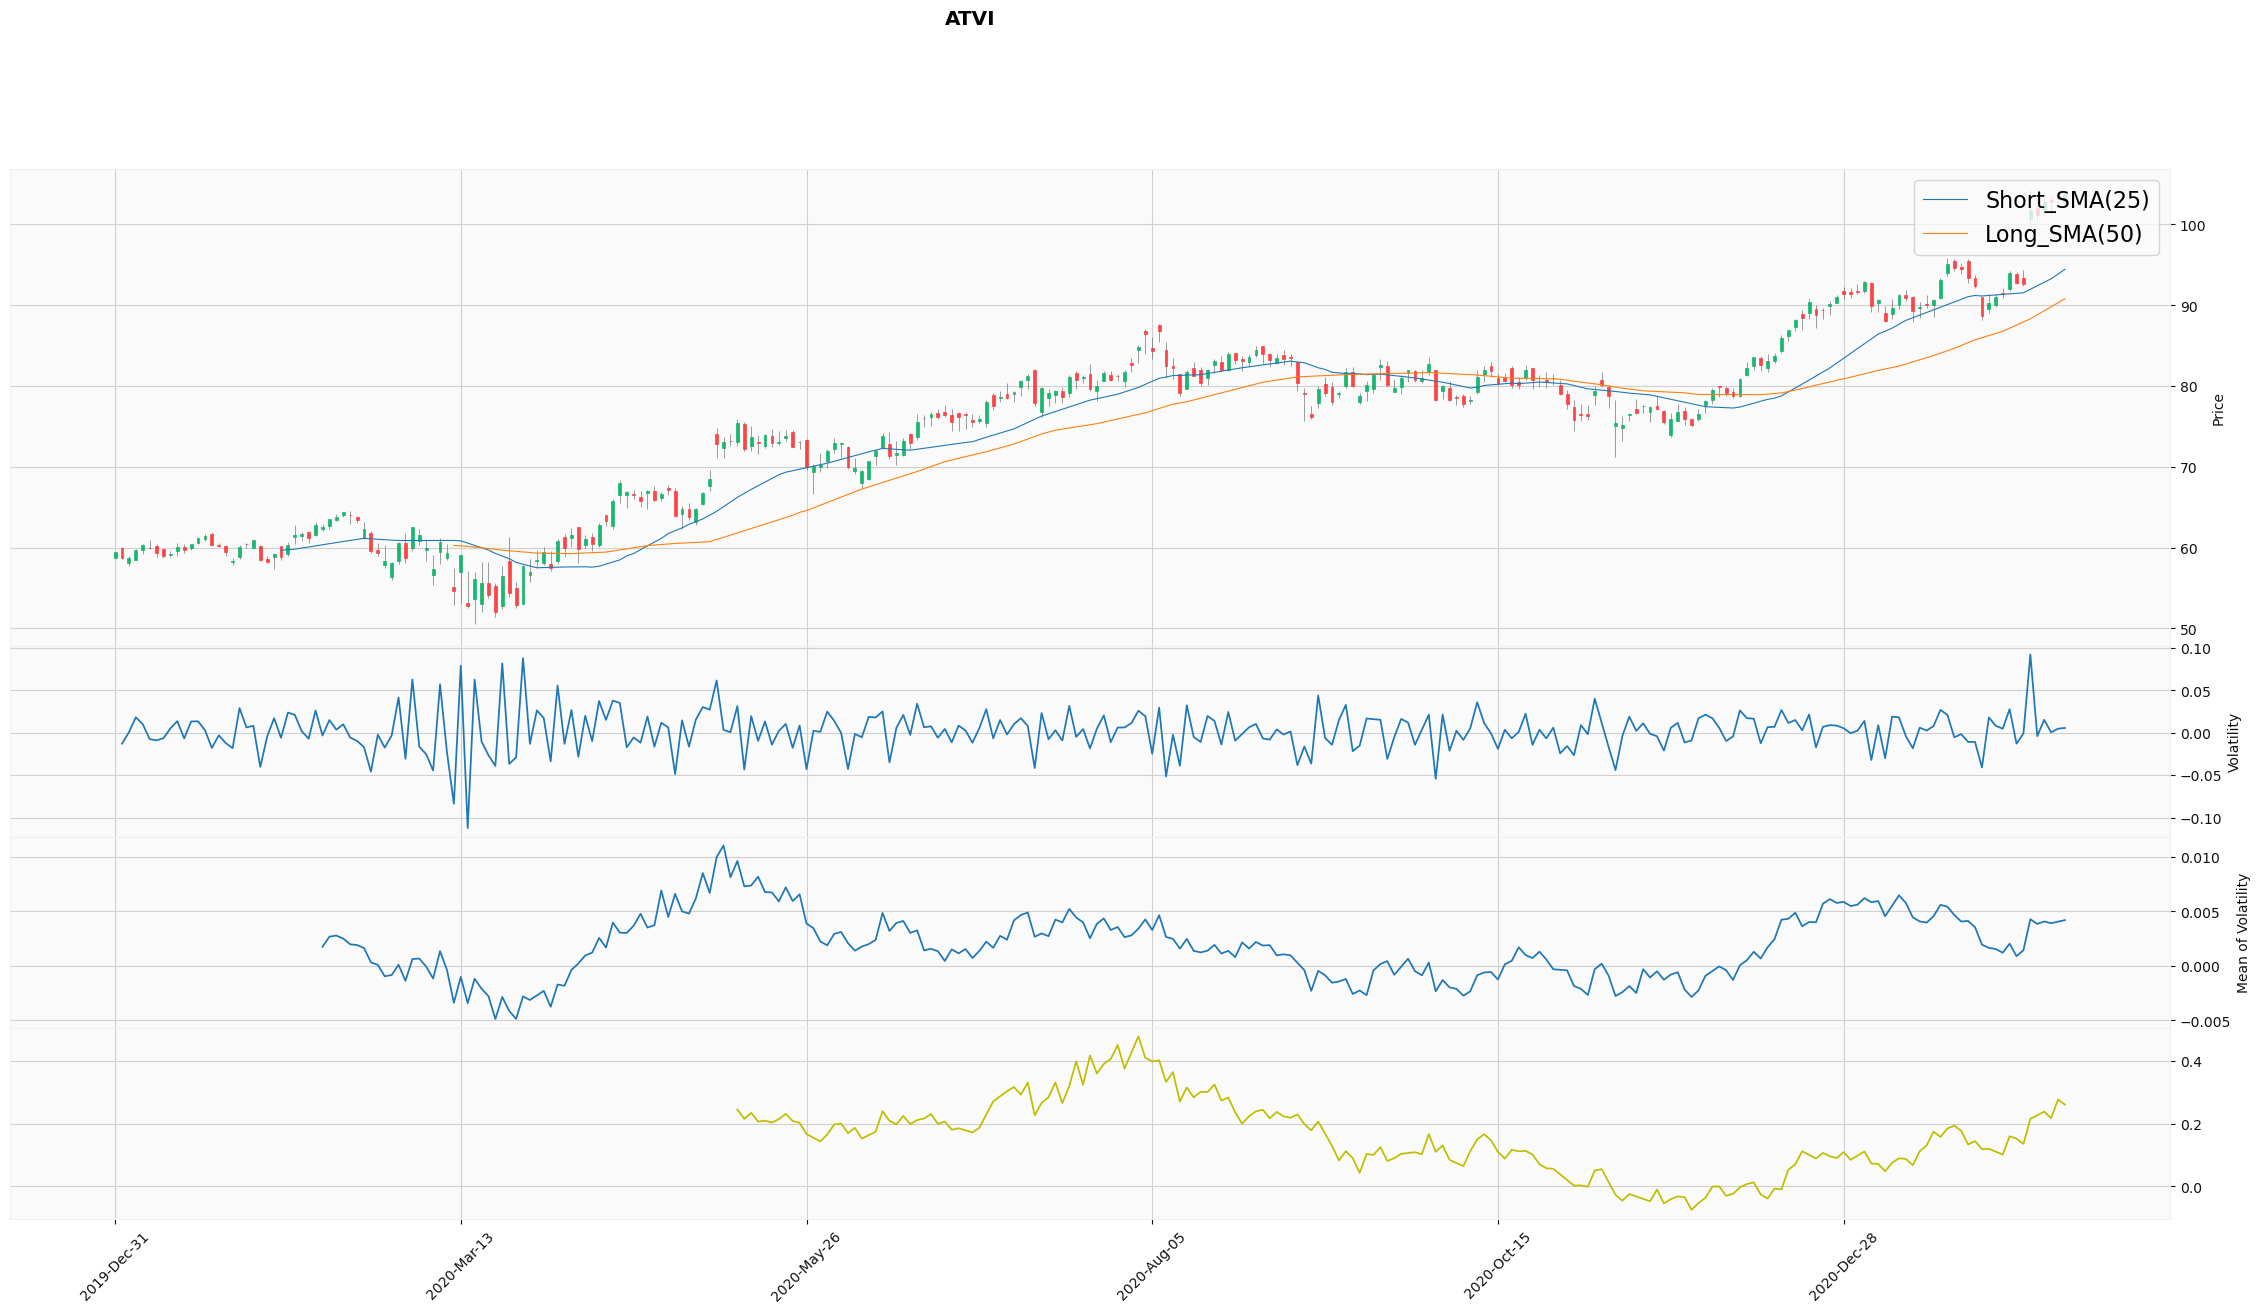

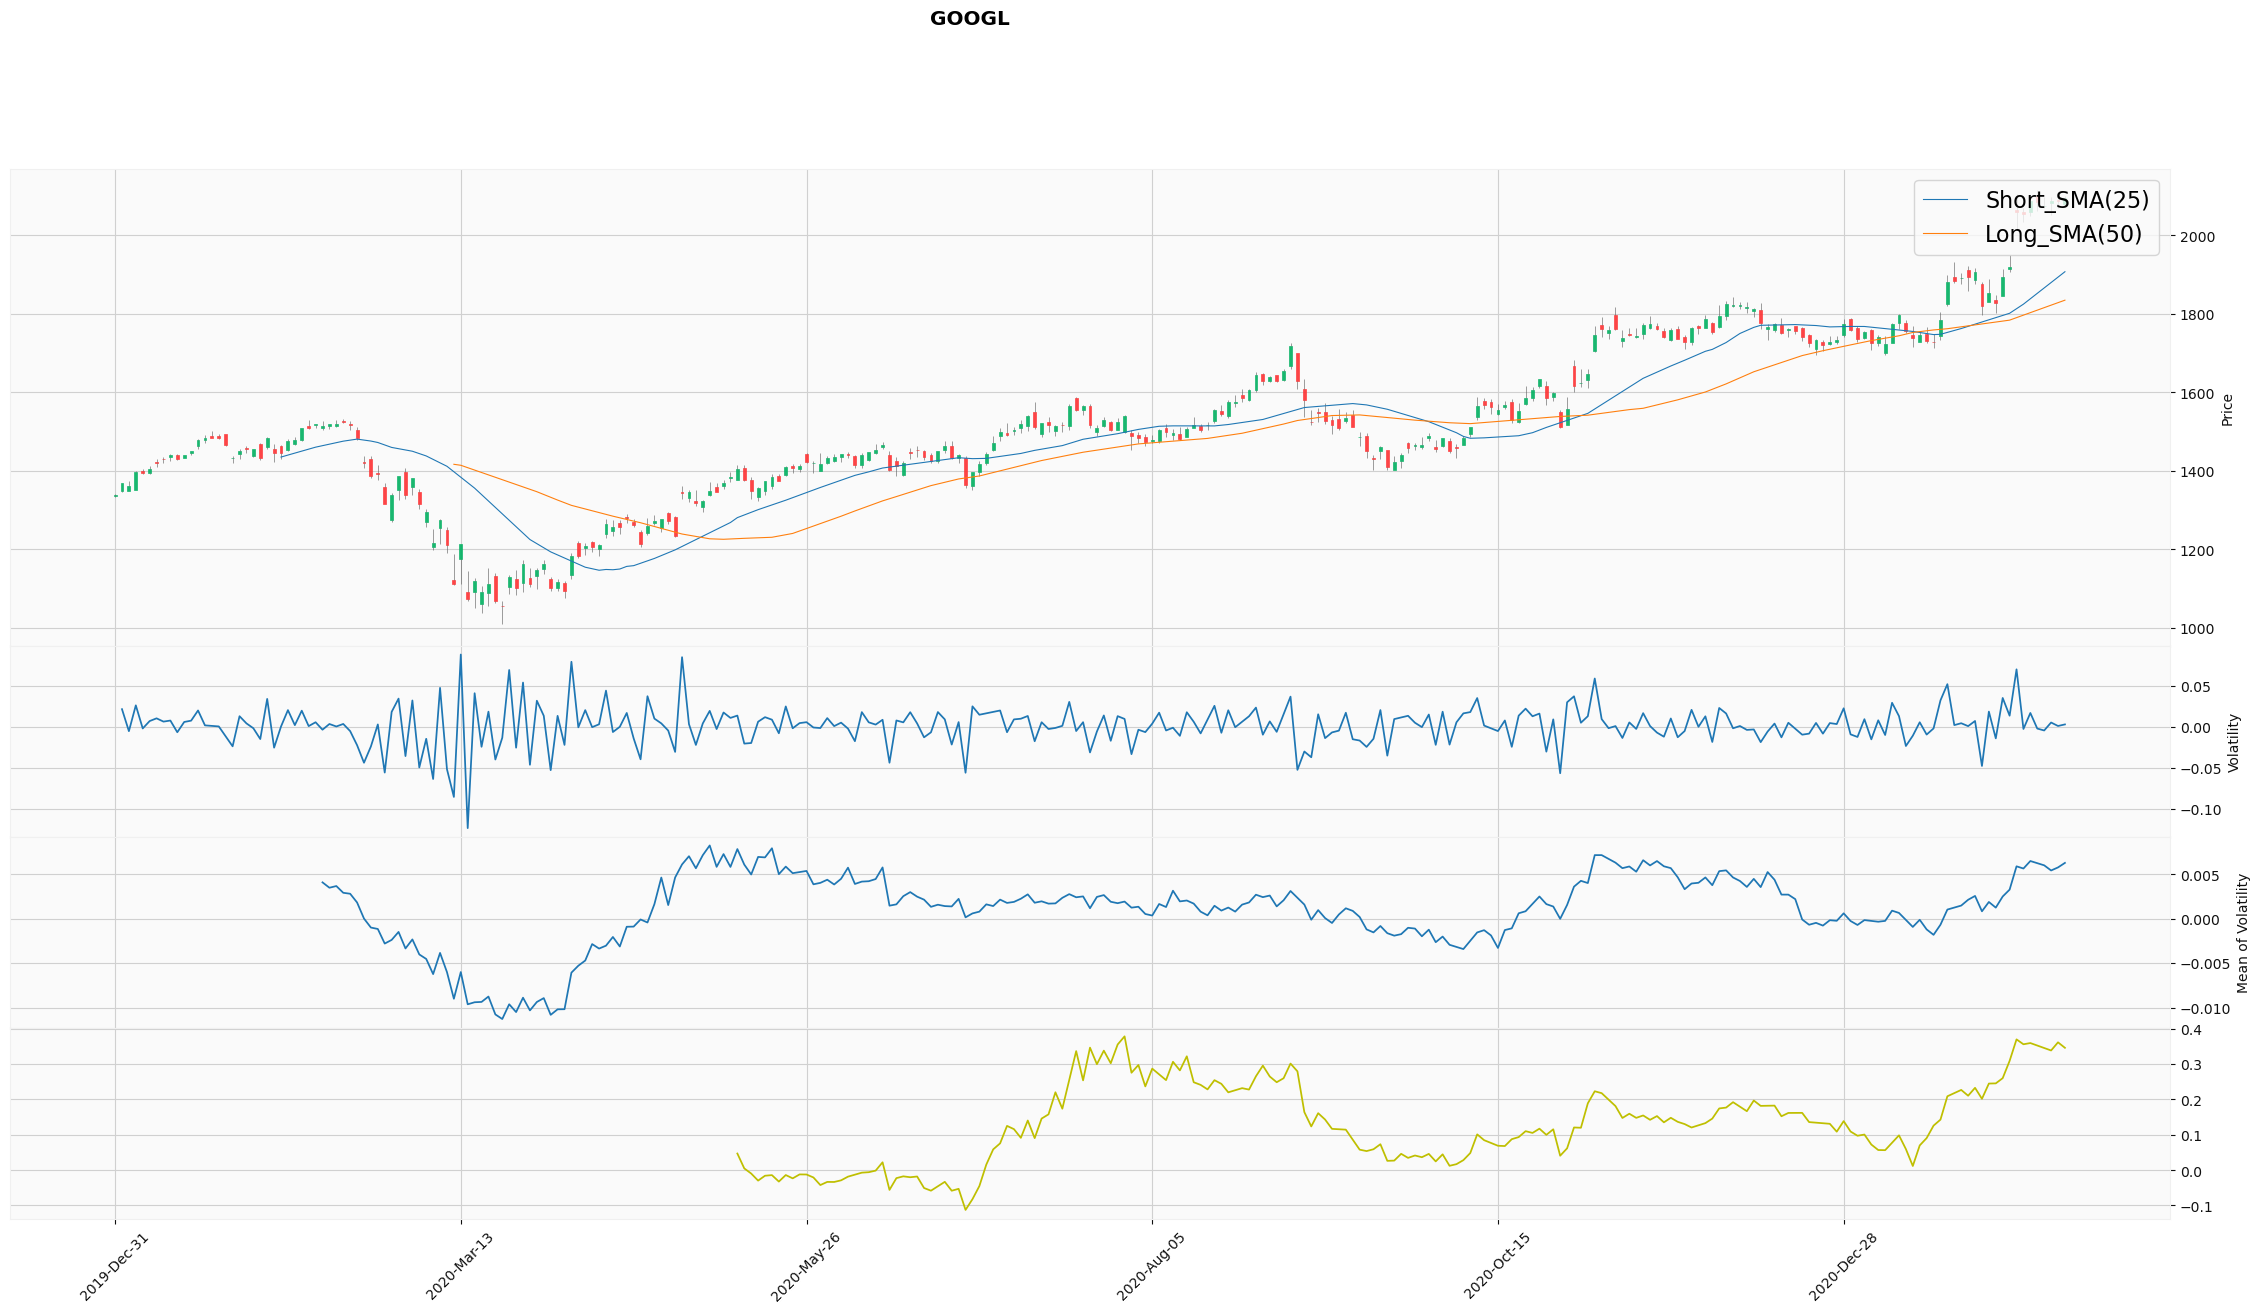

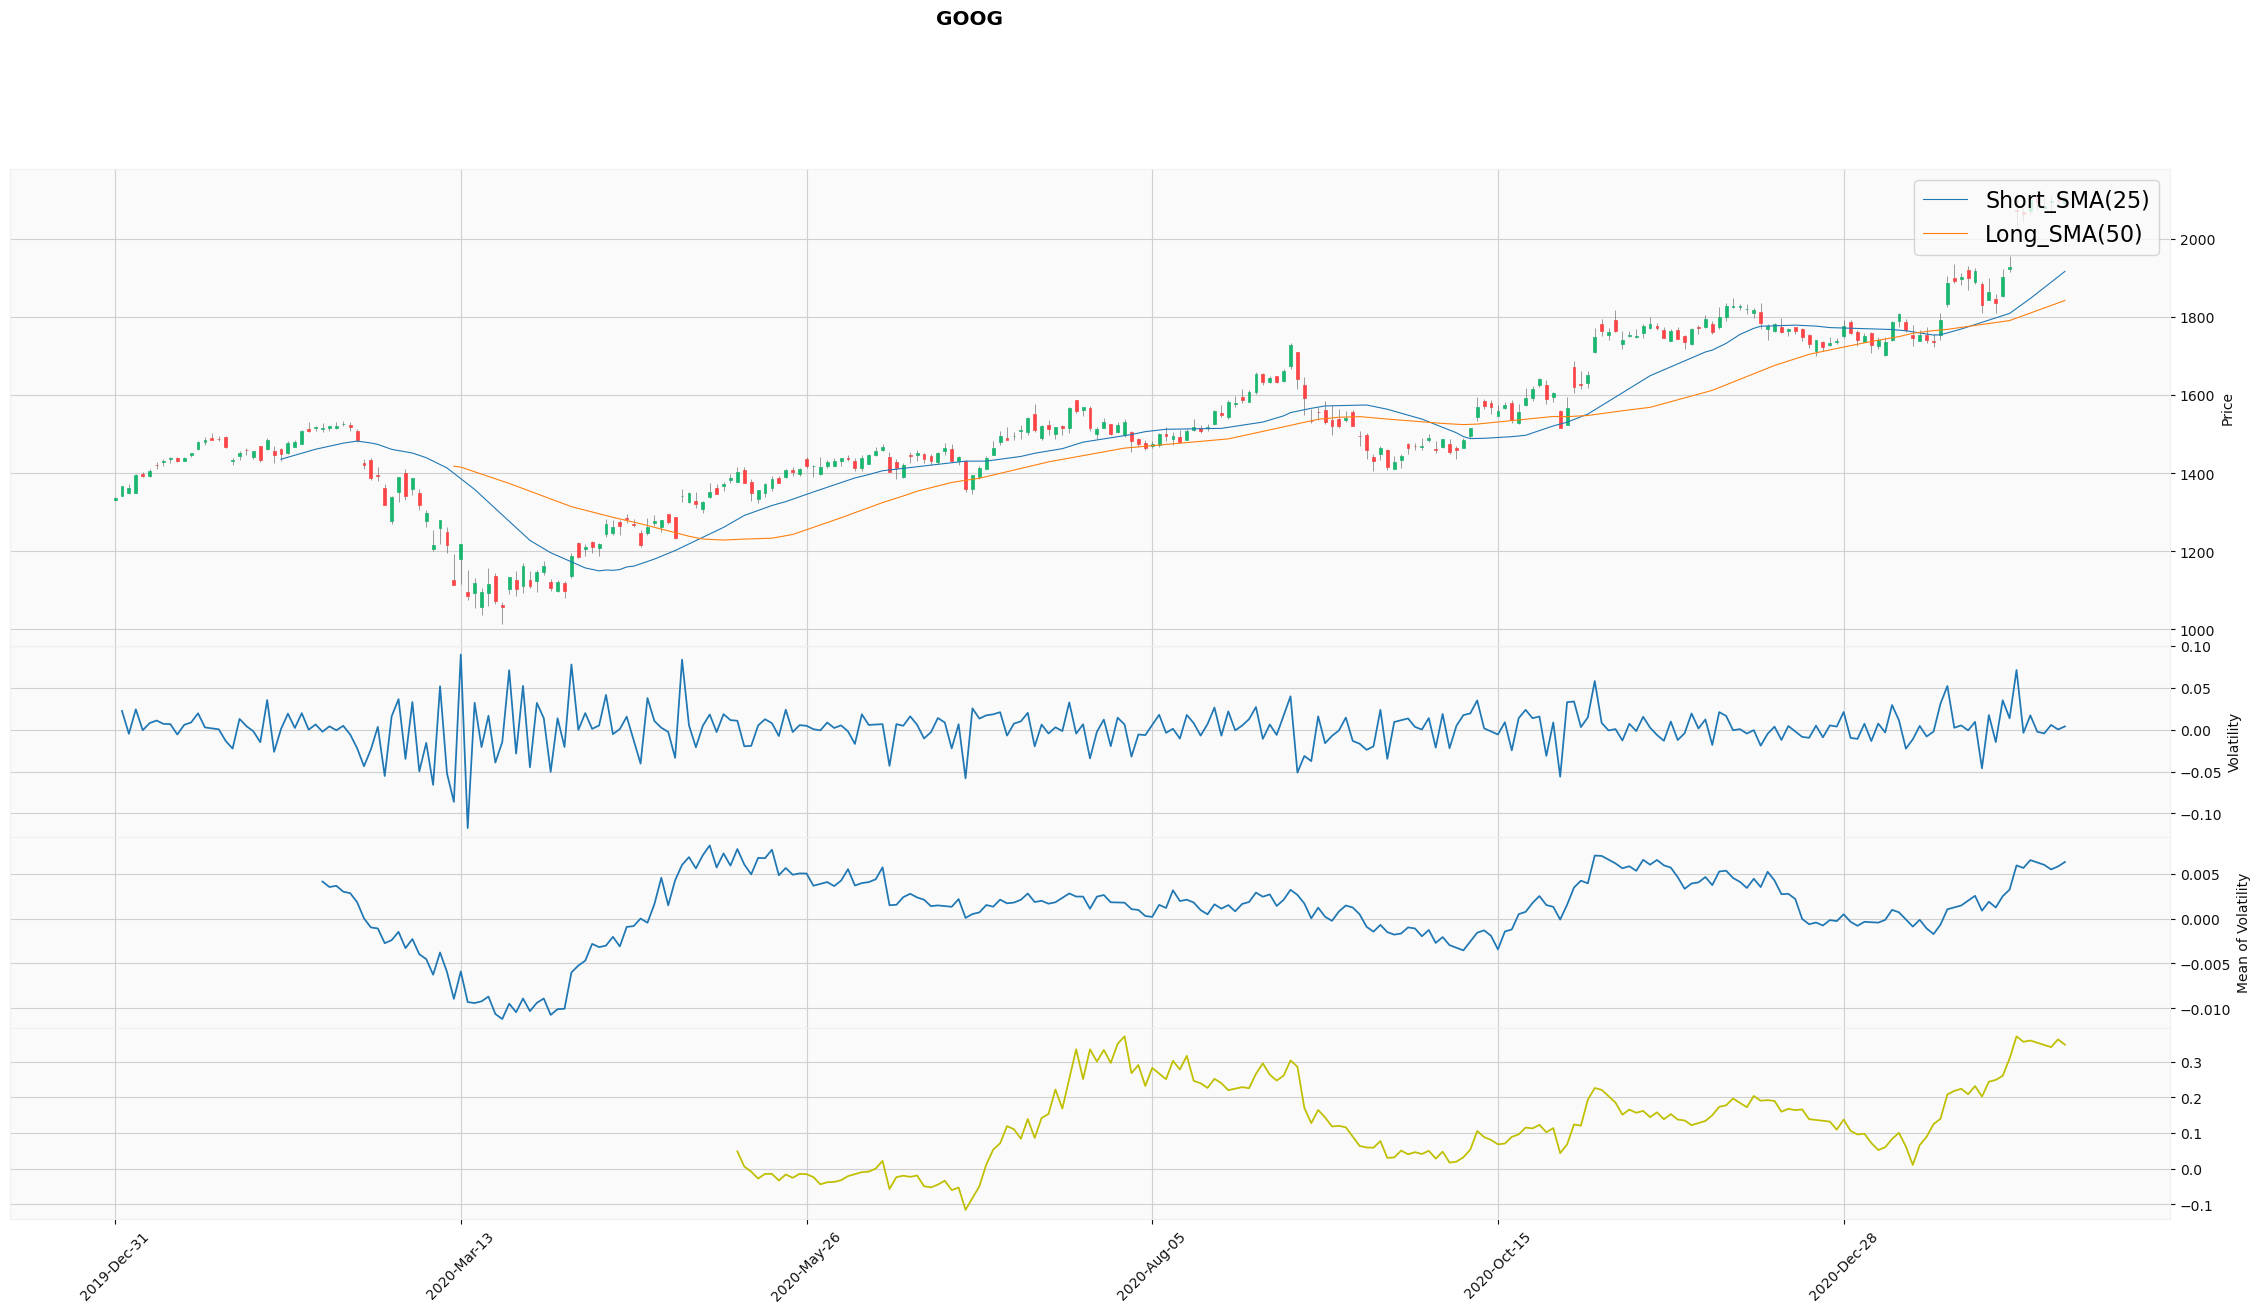

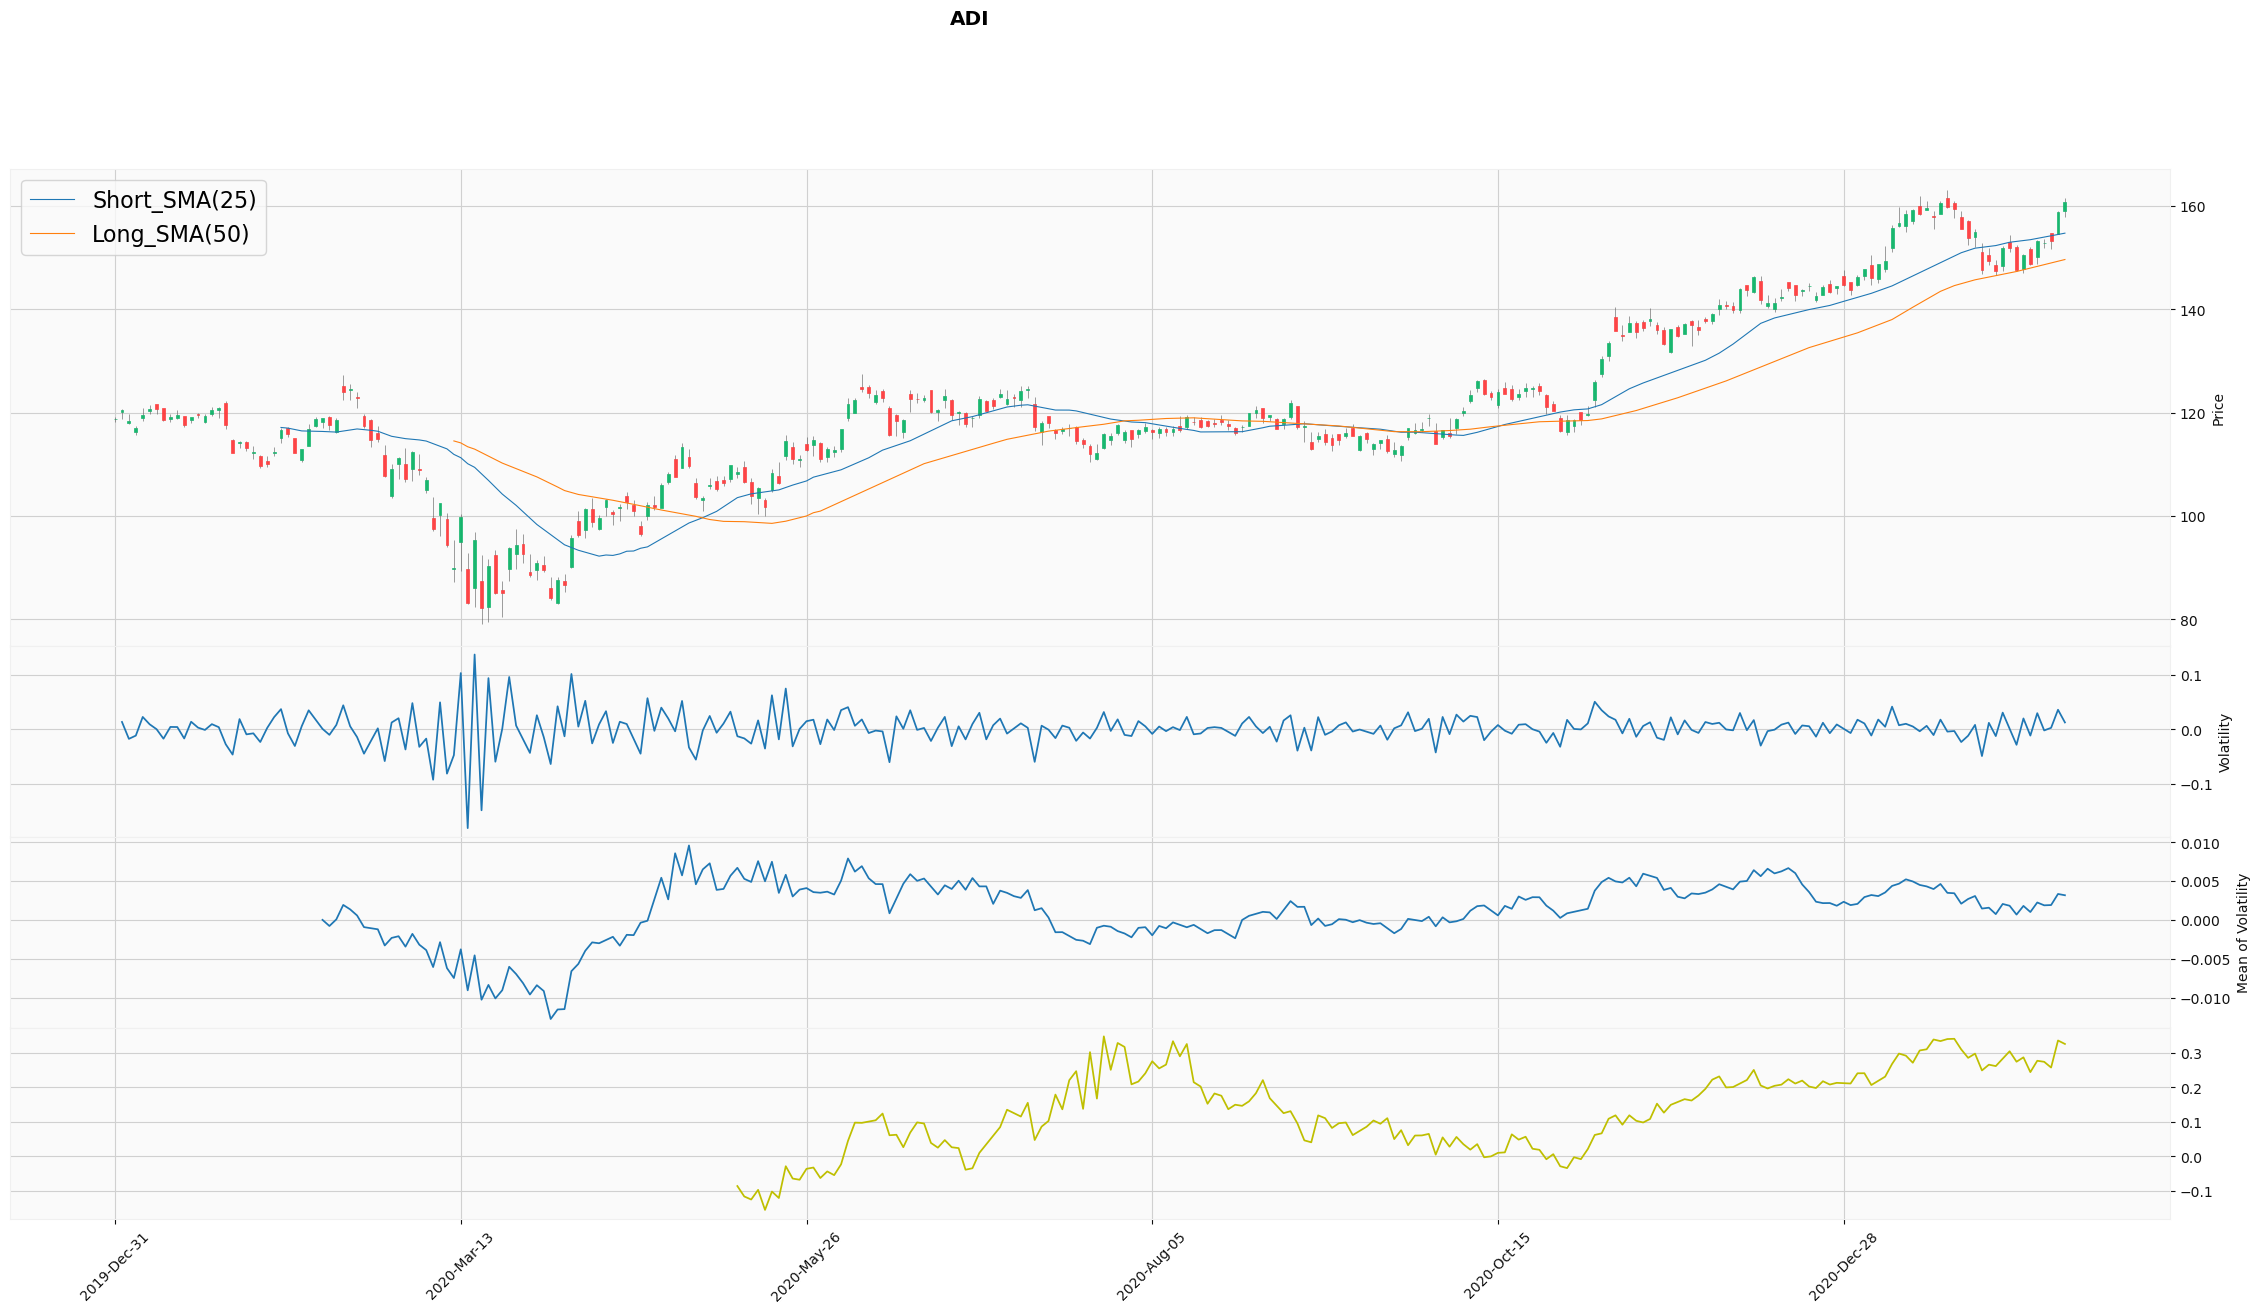

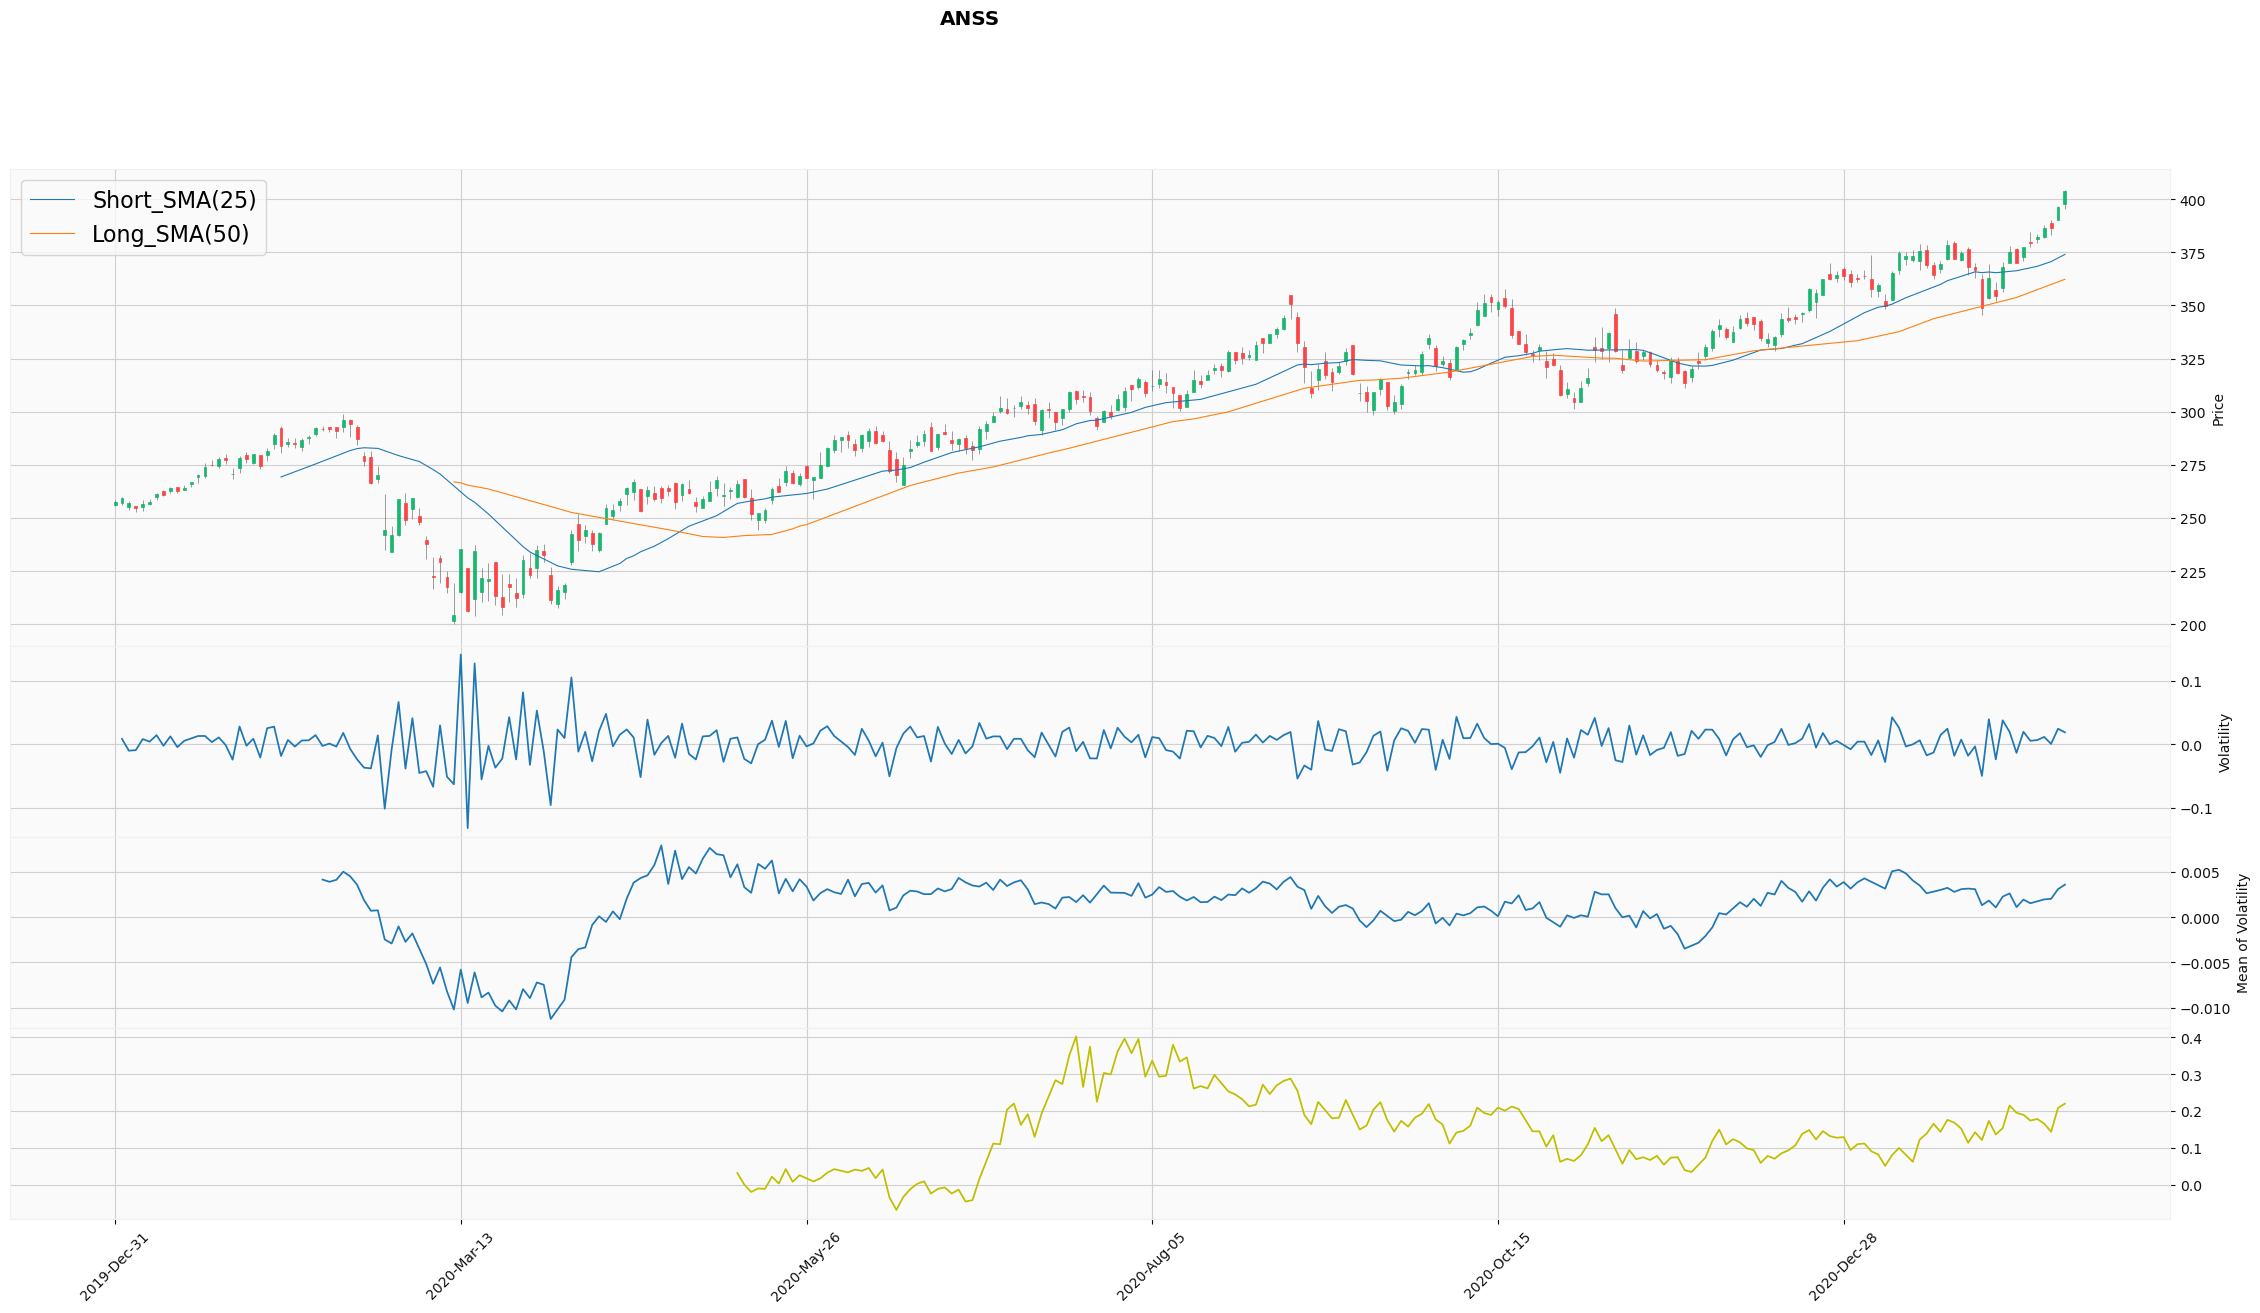

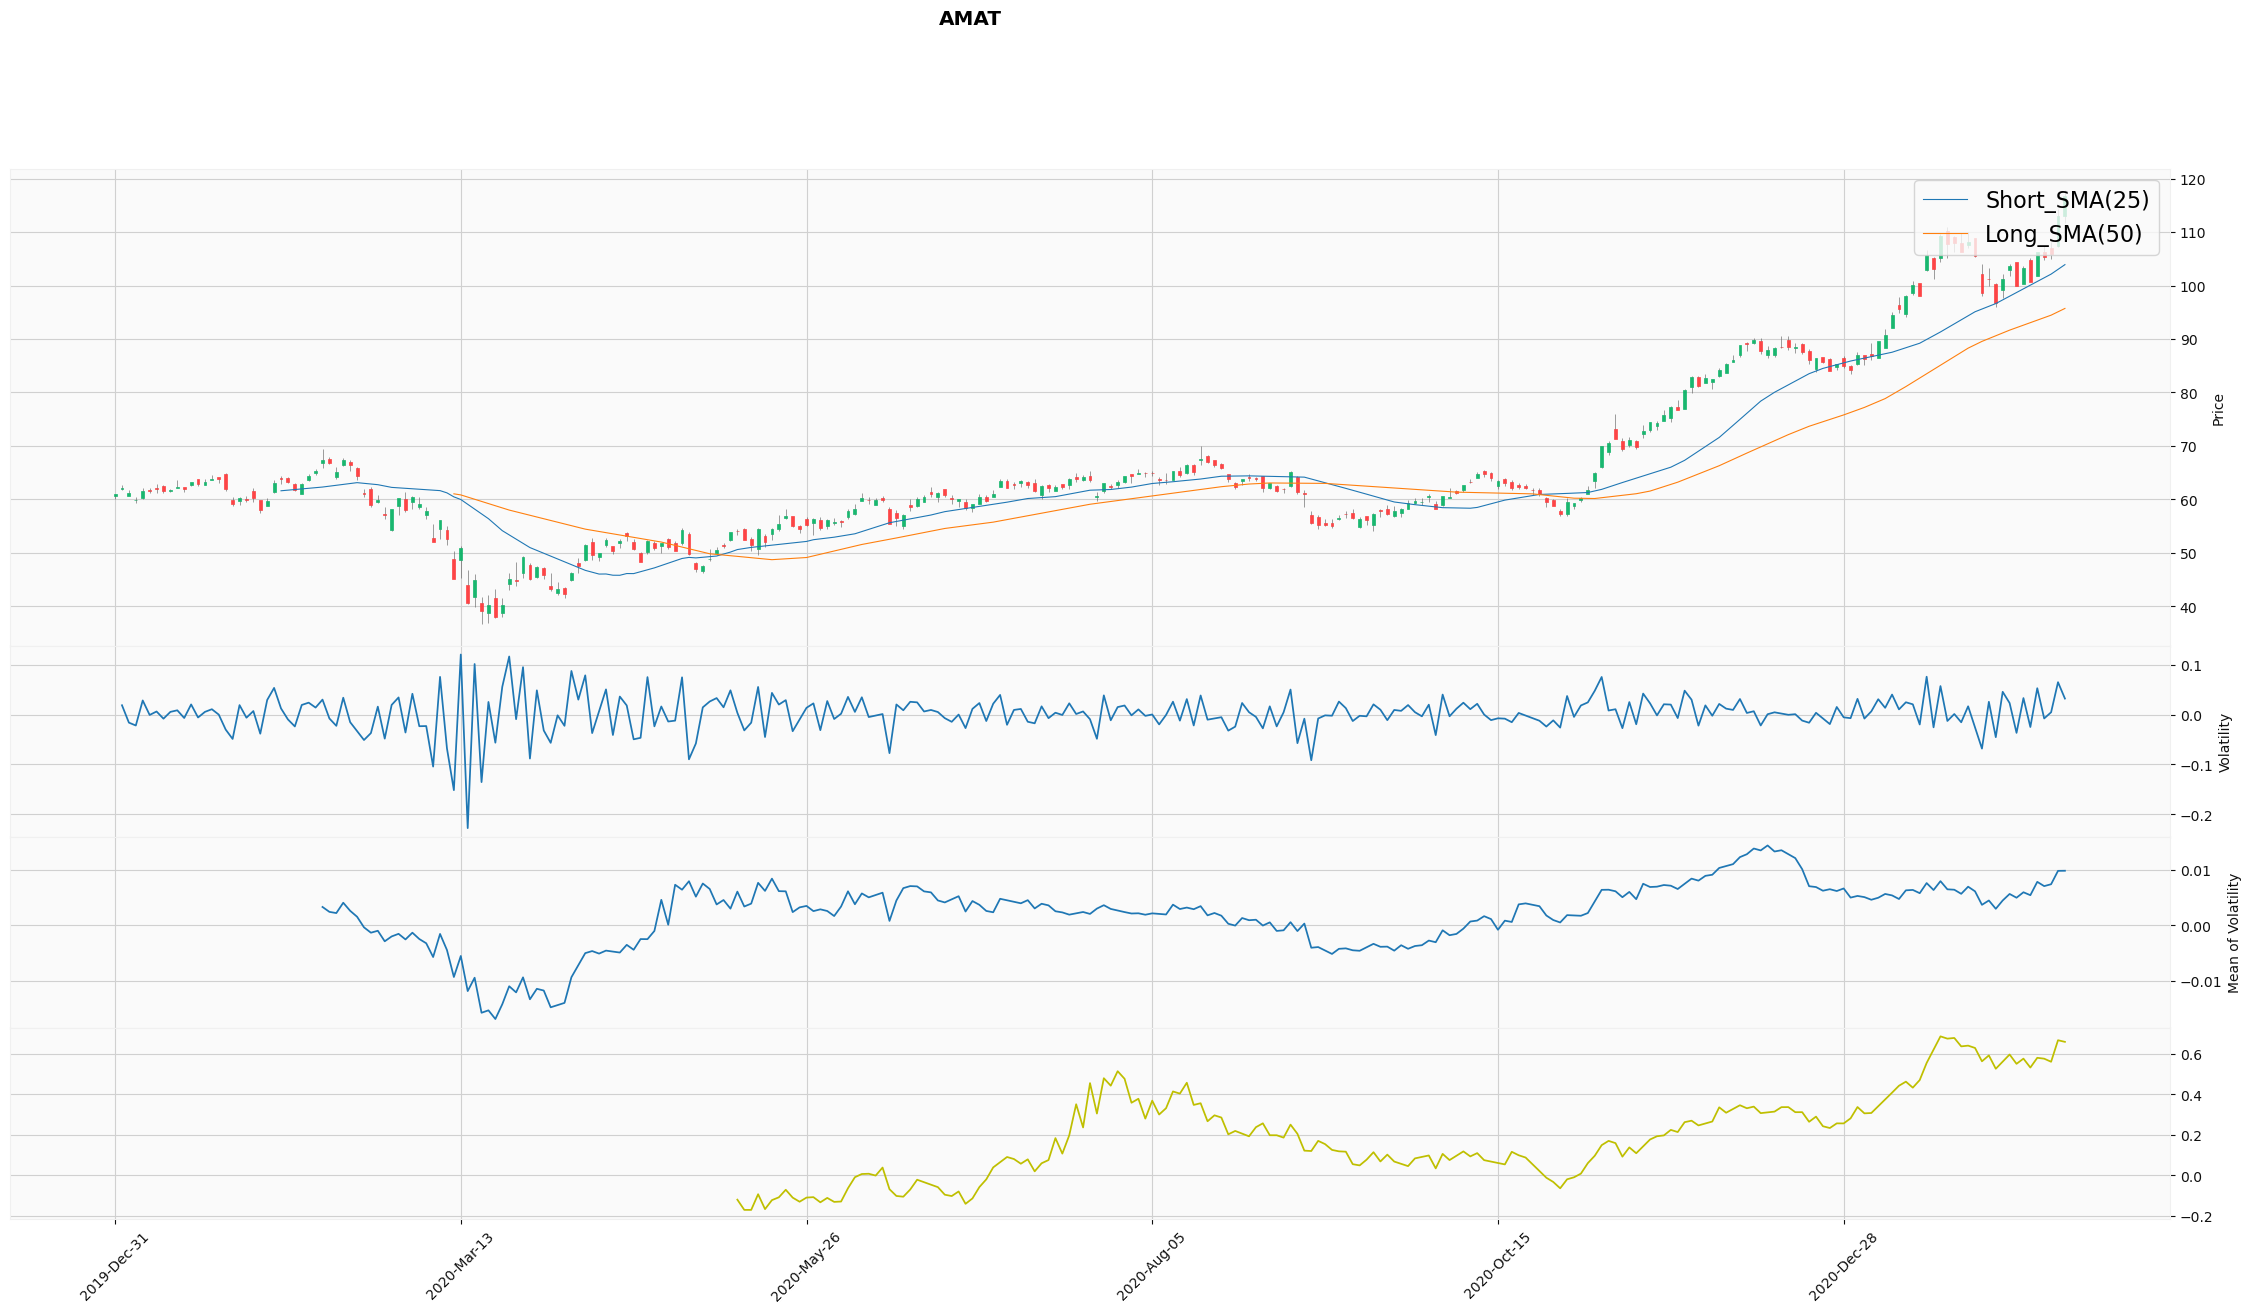

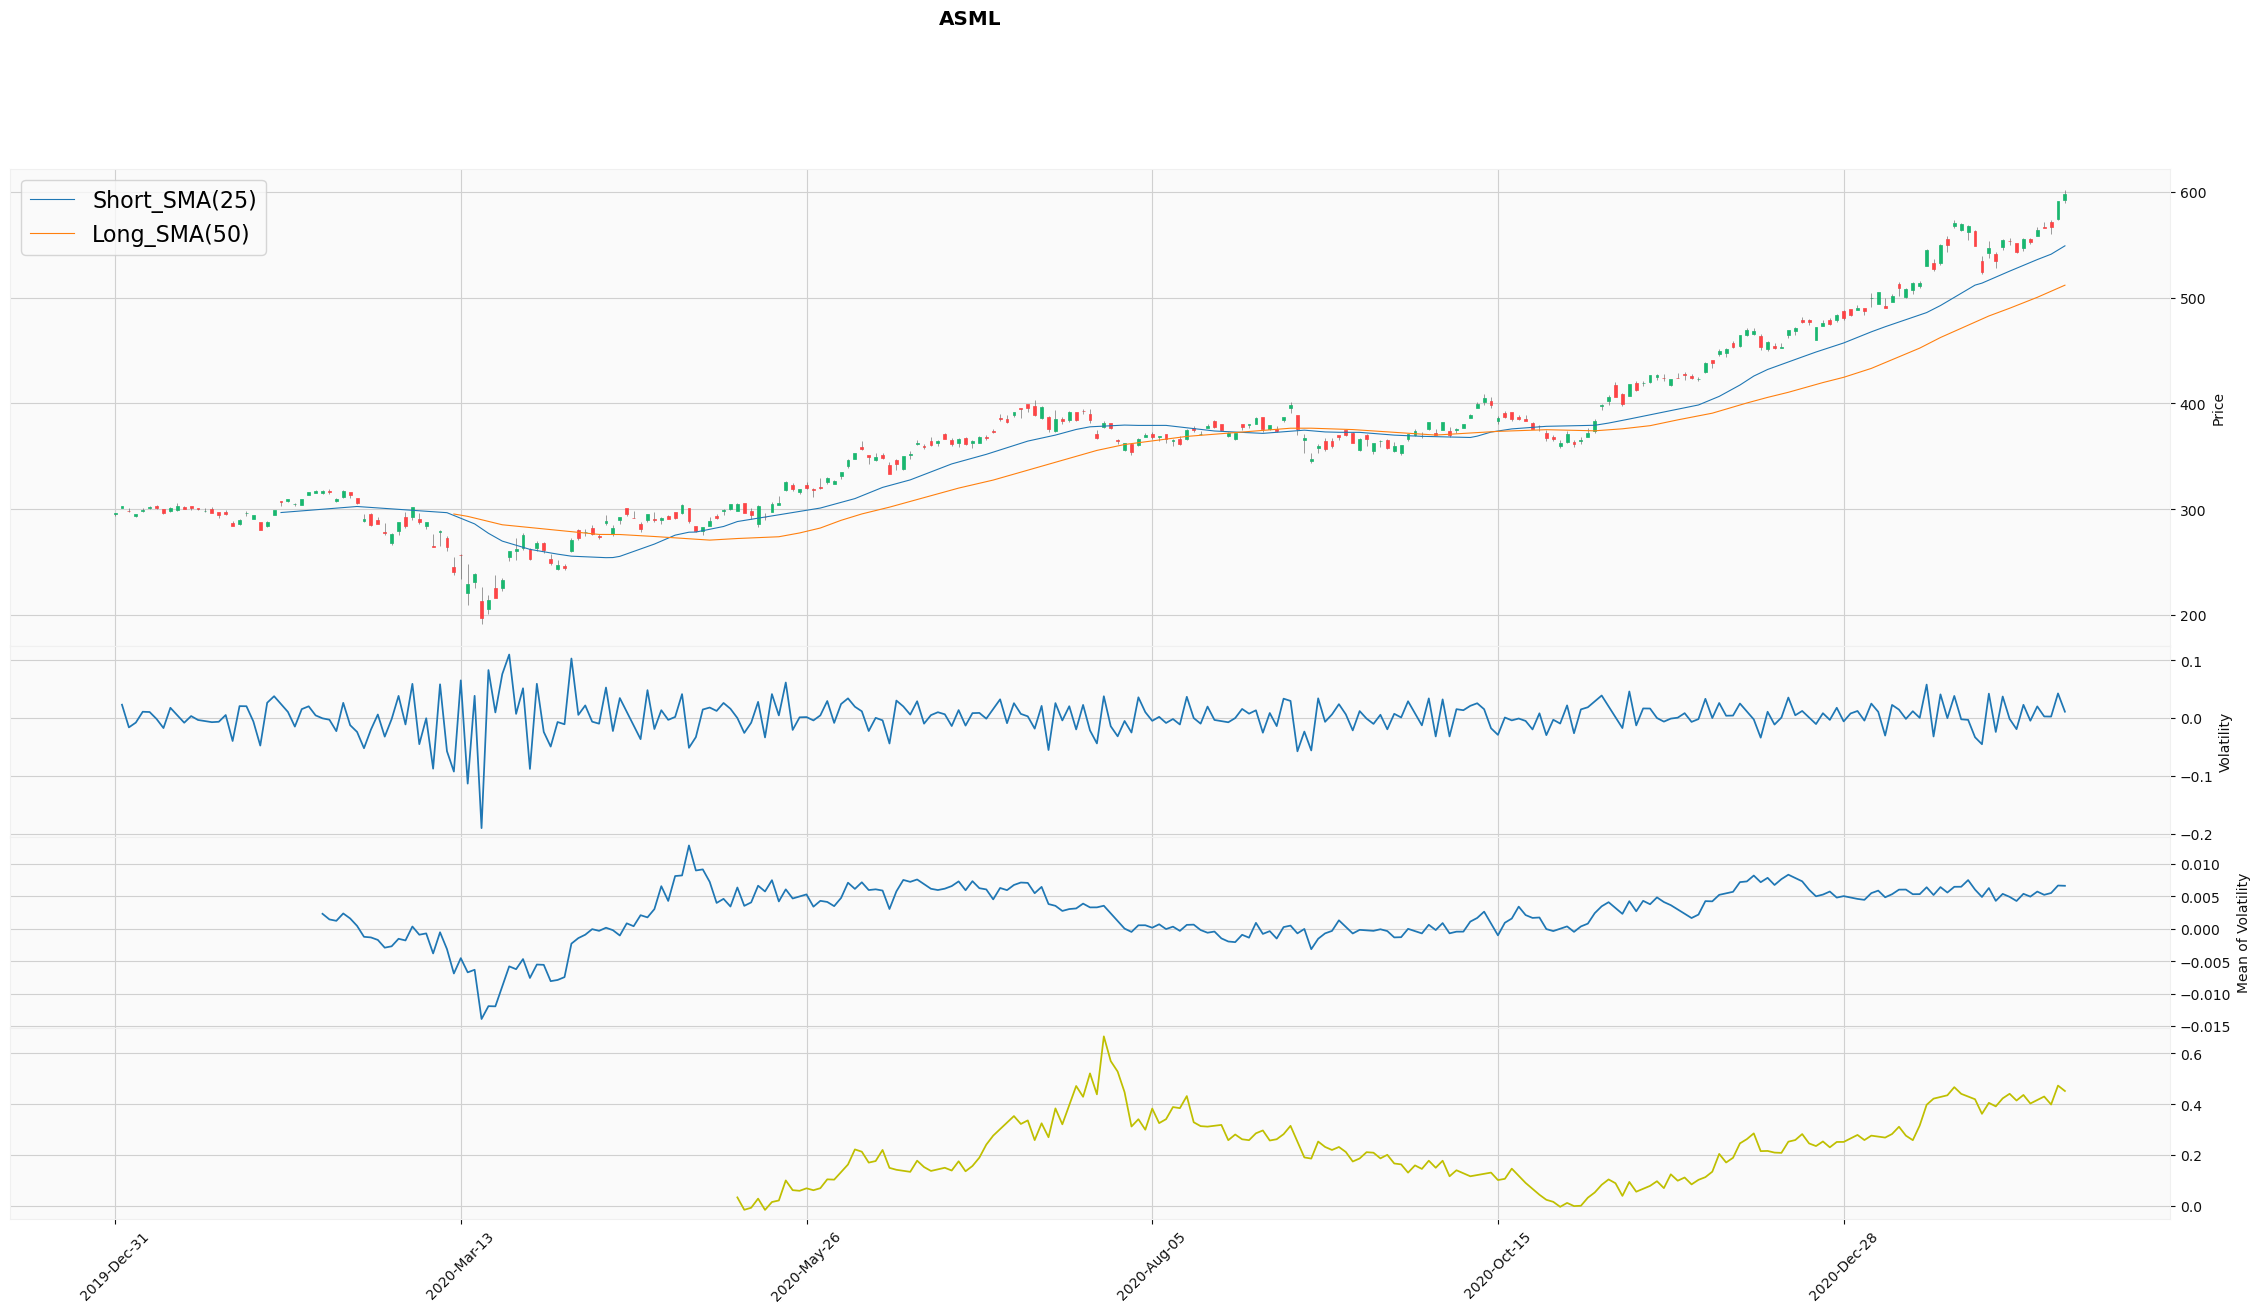

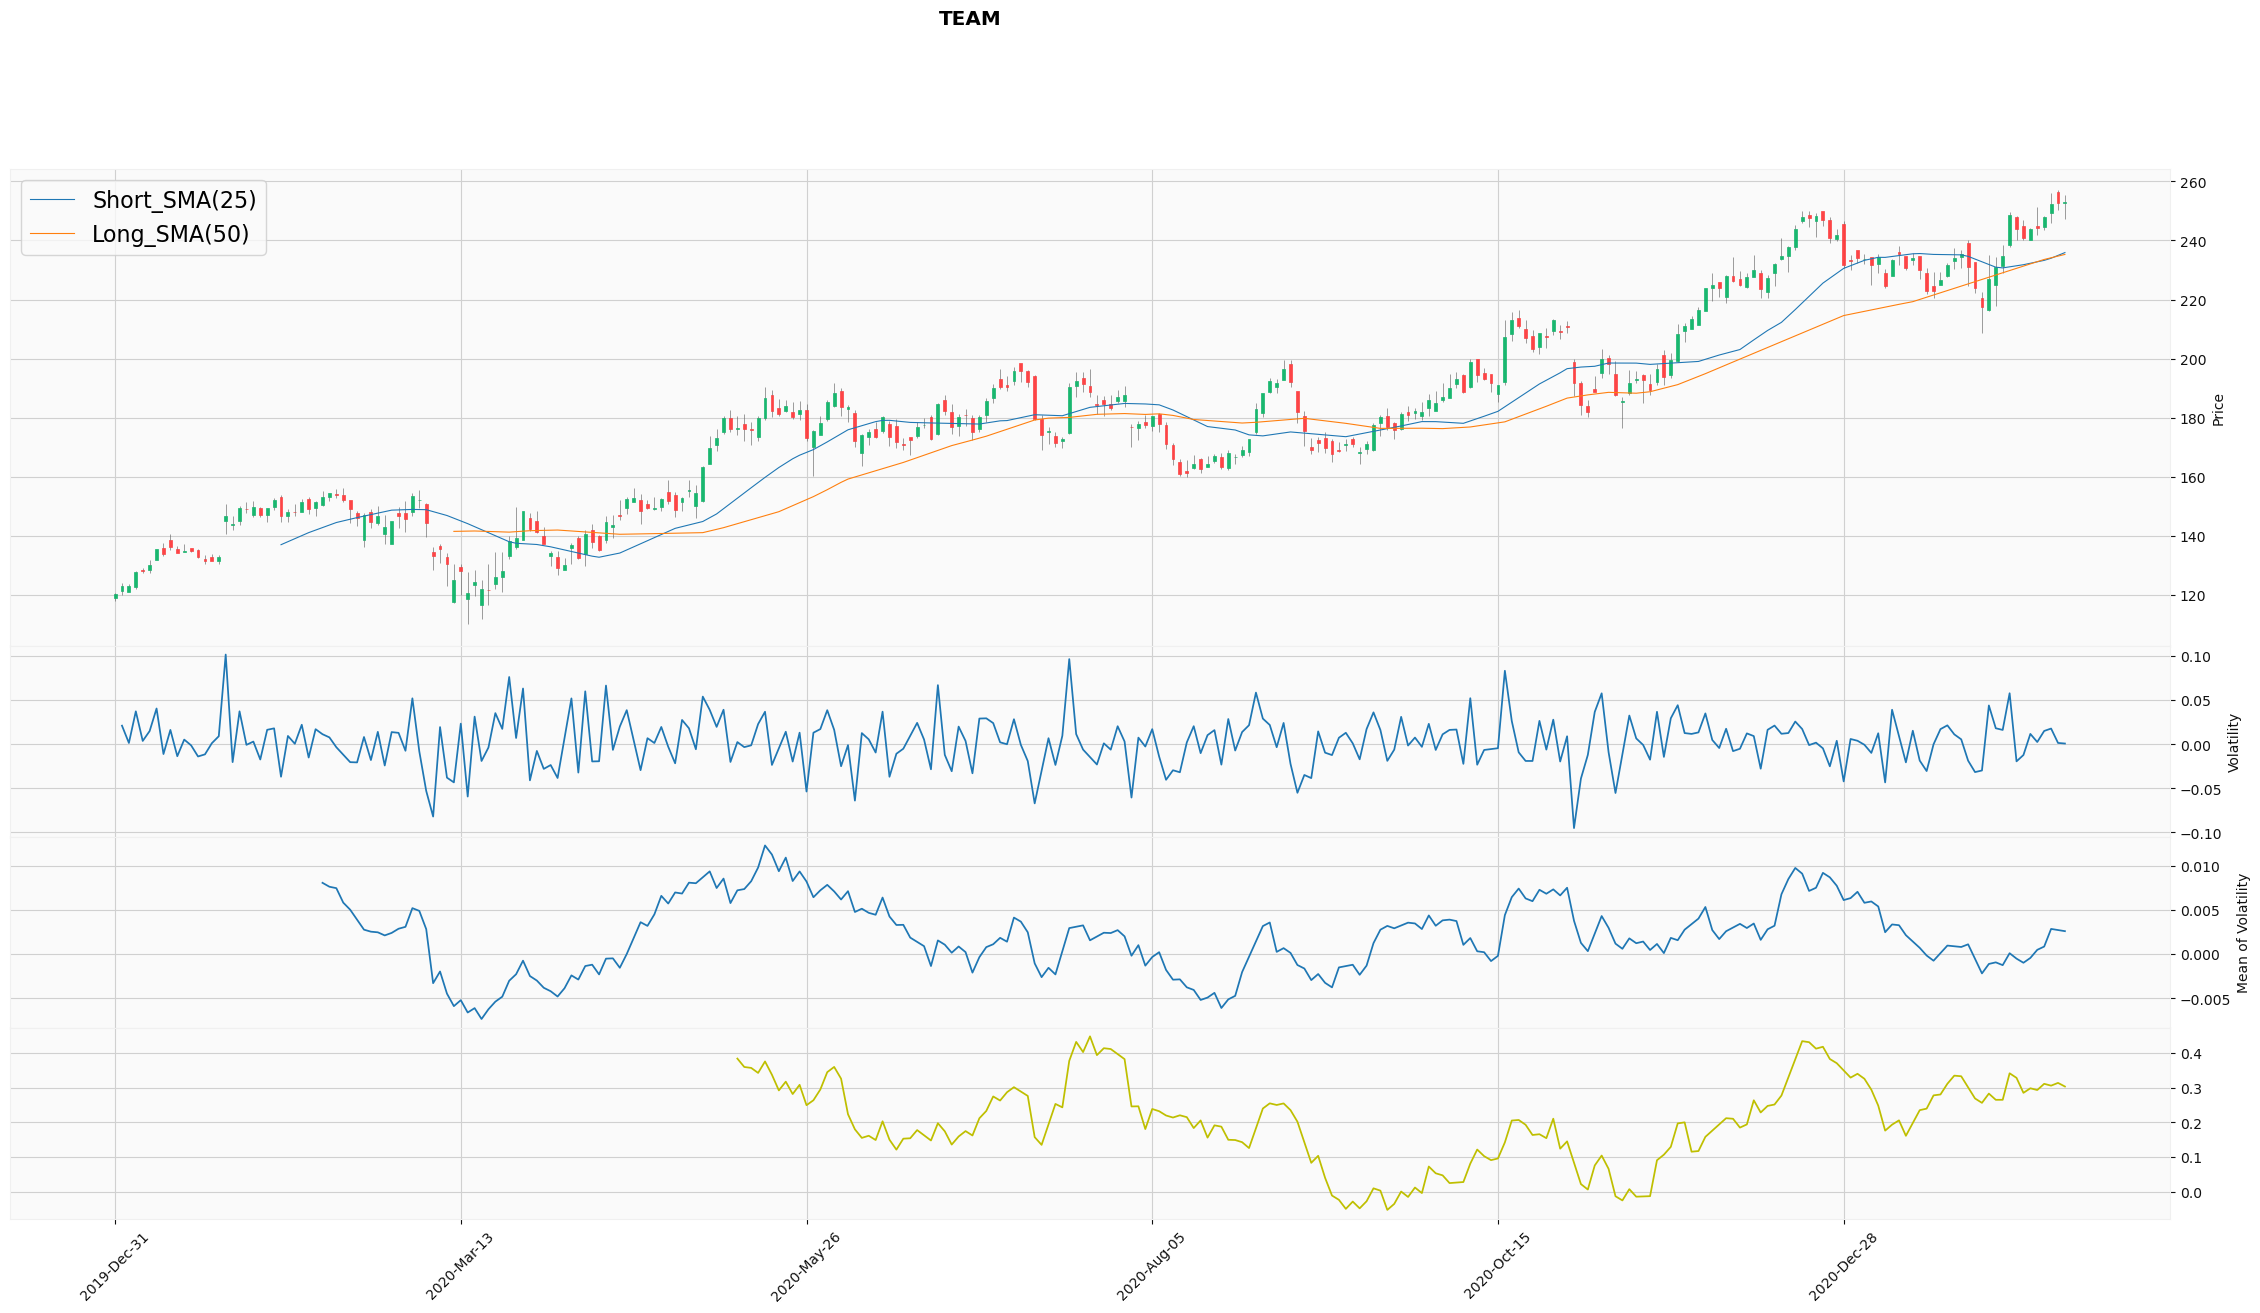

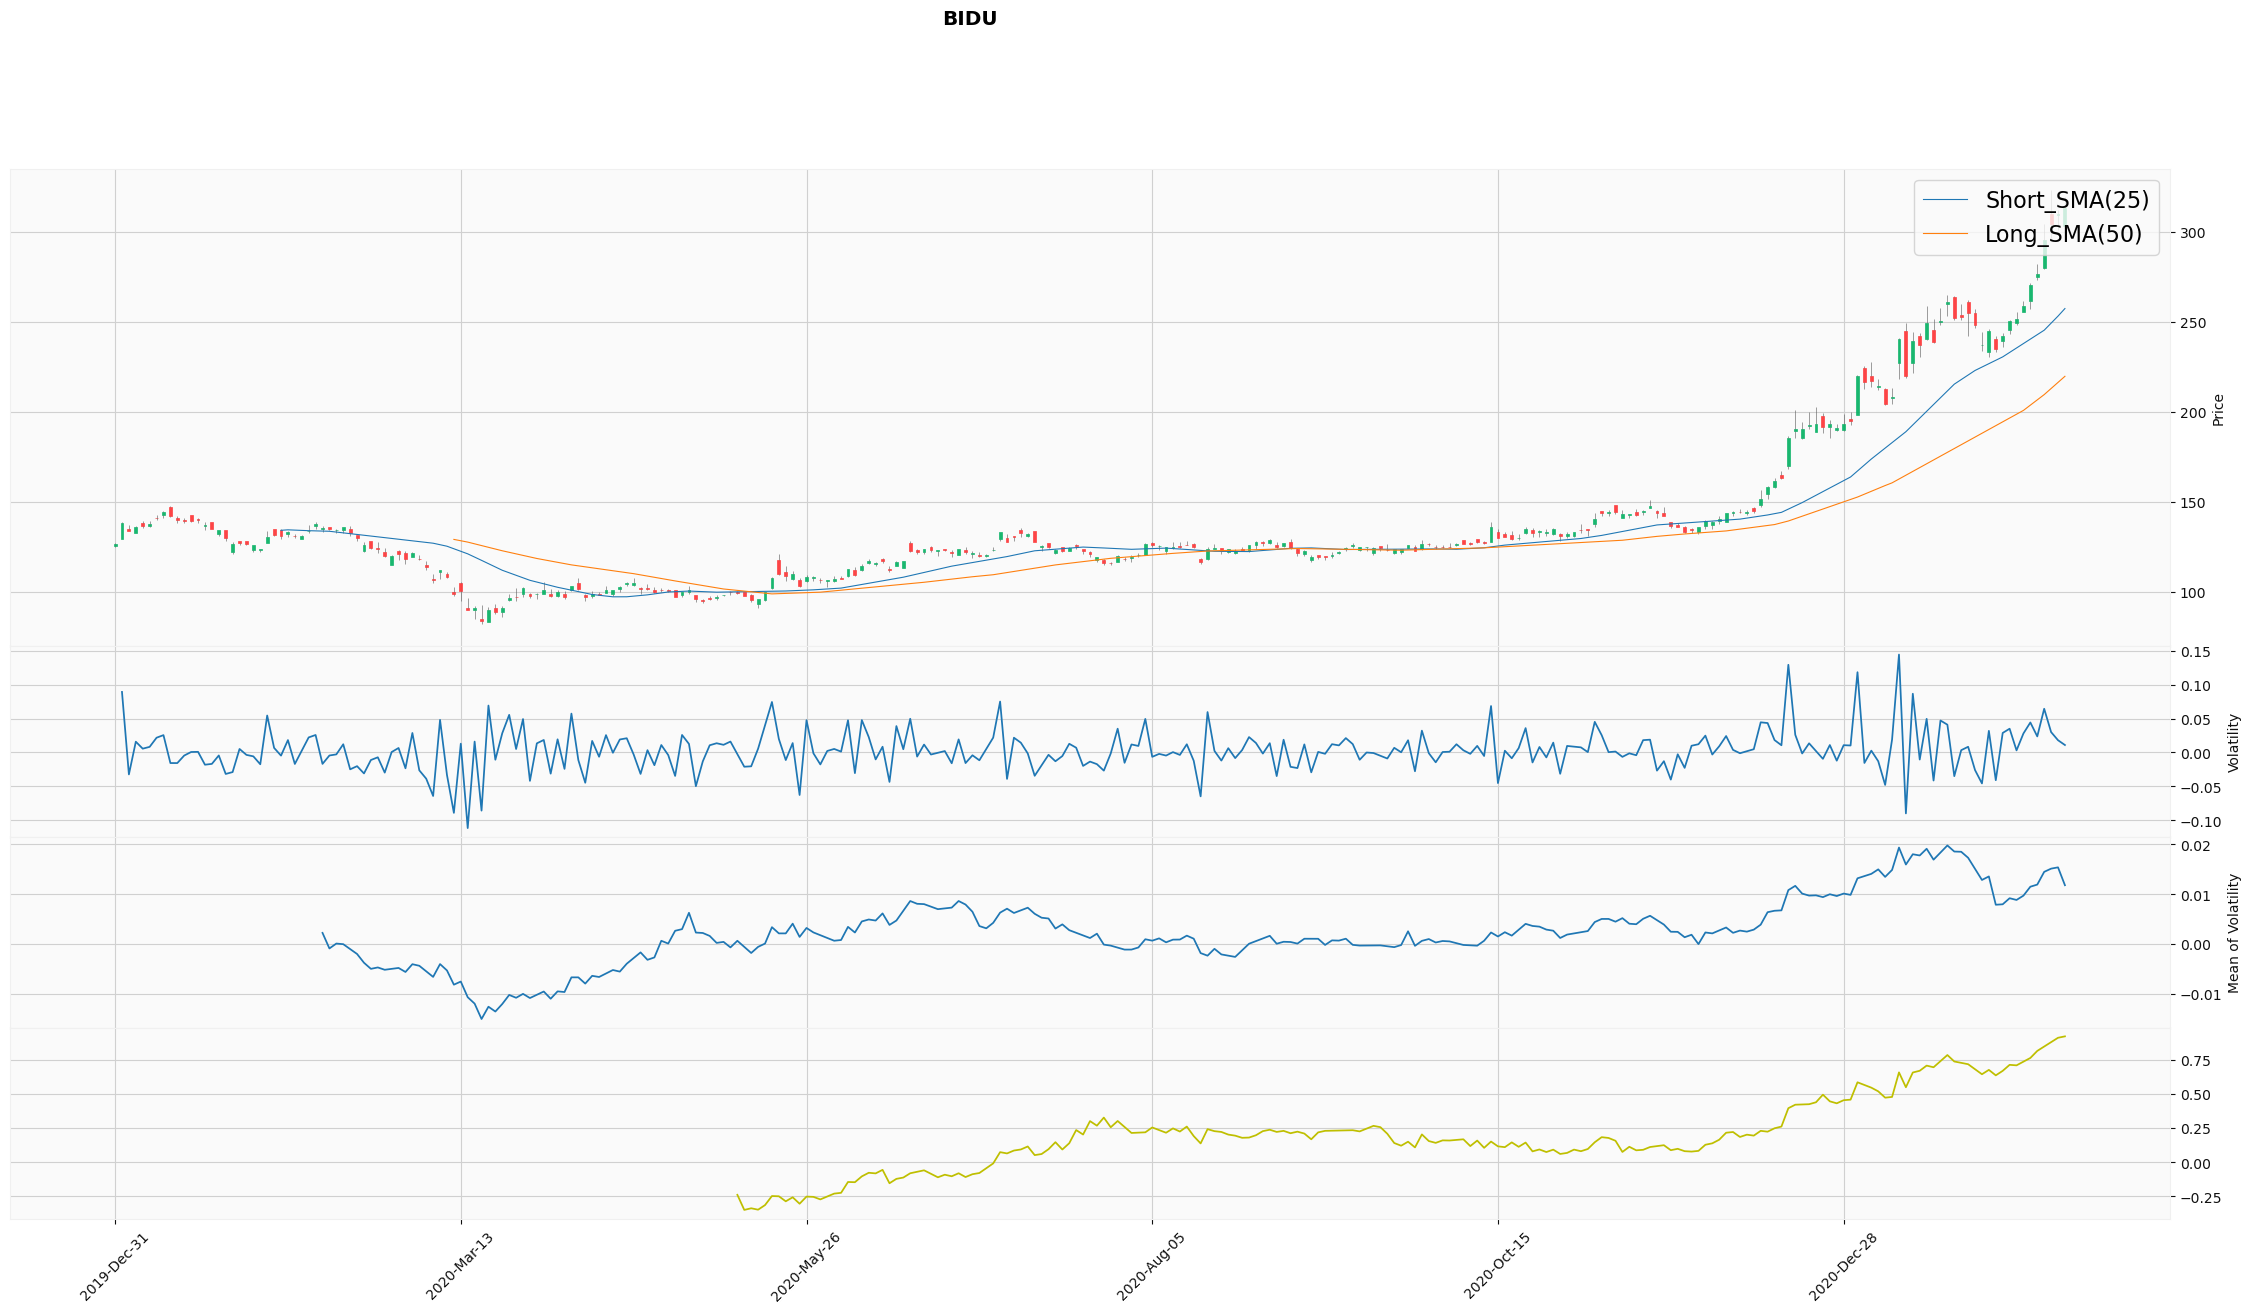

In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import mplfinance as mpl

start = '2020-01-01'
end = dt.datetime.now()
# stock_codes = ['ATVI', 'GOOGL', 'GOOG', 'ADI', 'ANSS', 'AMAT', 'ASML', 'TEAM', 'BIDU'] # bad:ISRC, good:CXX 
df = pd.read_csv('../../symbols/nasdaq100.csv')
signs = []
cnt = 0
for symbol in df['symbol']:
#     cnt += 1
#     if cnt == 10:
#         break
    signs.append(symbol)

for stock_code in stock_codes:
    df = yf.download(stock_code, start, end, interval='1d')

    df['volatility'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
    df['Vola Mean'] = df['volatility'].rolling(window=30).mean()
    df['Vola Sum'] = df['volatility'].rolling(window=90).sum()
    df['SMA50'] = df['Adj Close'].rolling(window=50).mean()
    df['SMA25'] = df['Adj Close'].rolling(window=25).mean()
    
    # plot chart
    apds = [
        mpl.make_addplot(df['volatility'], panel=1, type='line', ylabel='Volatility'),
        mpl.make_addplot(df['Vola Mean'], panel=2, type='line', ylabel='Mean of Volatility'),
        mpl.make_addplot(df['Vola Sum'], panel=3, type='line', color='y'),
        #mpl.make_addplot(df['change rate vola'], panel=1, type='line', ylabel='Volatility Change Rate'),
    ]
    fig, ax = mpl.plot(df, type='candle',figsize=(30, 15),
                        style='yahoo', addplot=apds, title=str(stock_code),
                       mav=(25, 50), returnfig=True)
    legend = ['Short_SMA(25)', 'Long_SMA(50)']
    ax[0].legend(legend, fontsize=16)